<a href="https://colab.research.google.com/github/juHa1205/NLP_2023/blob/main/1213.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size = 0.2)

In [ ]:
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=8,max_features=32,random_state=35)
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003, probability = True, random_state = 35).fit(X_train,y_train)
svm_predicted = svm.predict(X_test)
print("[accuracy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuracy]
d-tree:  0.8055555555555556
knn   :  0.8722222222222222
svm   :  0.9277777777777778


In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn',knn), ('svm',svm)],
    weights=[1,1,1], voting='hard').fit(X_train,y_train)

hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)


0.9277777777777778

In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
     weights=[1,1,1],voting='soft').fit(X_train,y_train)

soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.8916666666666667

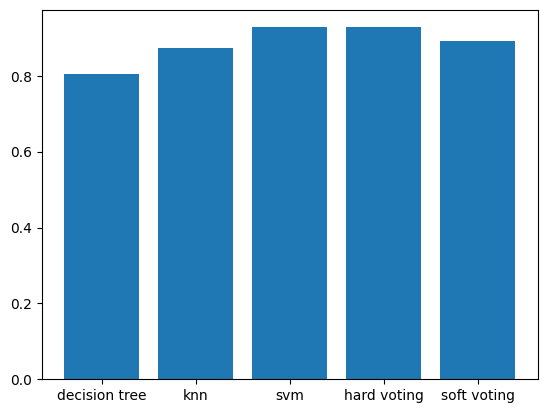

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height = [accuracy_score(y_test, dtree_predicted),
                     accuracy_score(y_test, knn_predicted),
                     accuracy_score(y_test, svm_predicted),
                     accuracy_score(y_test, hard_voting_predicted),
                     accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x,['decision tree','knn','svm','hard voting','soft voting']);